In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load AG News dataset (adjust path & column names if needed)
df = pd.read_csv("../data/ag_news_train.csv")   # columns: label, title, description

# Merge title + description into one text column
df['text'] = (df['title'].fillna('') + " " + df['description'].fillna('')).str.lower()

# Basic cleaning: remove links and extra spaces
df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\.\S+", " ", str(x)))
df['text'] = df['text'].str.replace(r"\s+", " ", regex=True).str.strip()

# Split into train/val
X_train, X_val, y_train, y_val = train_test_split(
    df['text'], df['label'], test_size=0.16666, stratify=df['label'], random_state=42
)

print("Train size:", len(X_train), "Validation size:", len(X_val))
print("Classes:", df['label'].unique())

Train size: 100000 Validation size: 20000
Classes: [3 4 2 1]


In [2]:
# Compute word_count
train_len = X_train.apply(lambda s: len(str(s).split()))
val_len   = X_val.apply(lambda s: len(str(s).split()))

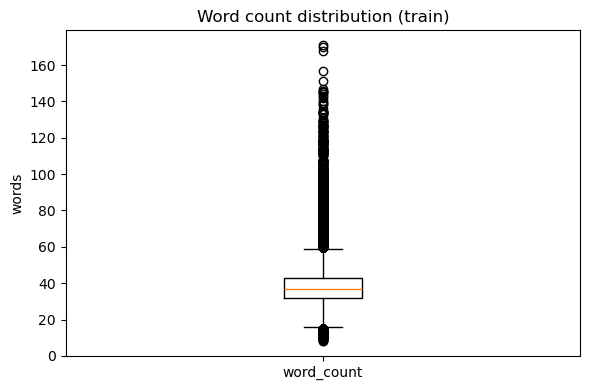

In [7]:
# EDA: boxplot
plt.figure(figsize=(6,4))
plt.boxplot([train_len], tick_labels=['word_count'])  # fixed
plt.title("Word count distribution (train)")
plt.ylabel("words")
plt.tight_layout(); plt.show()

In [8]:
# IQR rule on train
Q1, Q3 = train_len.quantile(0.25), train_len.quantile(0.75)
IQR = Q3 - Q1
low_thr, high_thr = max(1, int(Q1 - 1.5*IQR)), int(Q3 + 1.5*IQR)

print(f"IQR filtering thresholds: low<{low_thr}, high>{high_thr}")

keep_mask = (train_len >= low_thr) & (train_len <= high_thr)
print("Train kept:", keep_mask.sum(), " / ", len(keep_mask))

X_train_out = X_train[keep_mask]
y_train_out = pd.Series(y_train).loc[X_train_out.index]

IQR filtering thresholds: low<15, high>59
Train kept: 97099  /  100000


In [10]:
print("Shapes -> train:", X_train_out.shape, "val:", X_val.shape)

Shapes -> train: (97099,) val: (20000,)
